In [1]:
!pip install gdal
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 59.7 MB/s eta 0:00:00


In [21]:
!pip install spectral

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 3.7 MB/s eta 0:00:00


In [22]:
#tifffile

import tifffile as tif
import matplotlib.pyplot as plt
from spectral import imshow

In [12]:
img = tif.imread('/content/drive/MyDrive/Notebooks_pdi_samara/L71221071_07120010720_DN.tif')

In [14]:
img.shape

(1233, 1520, 6)

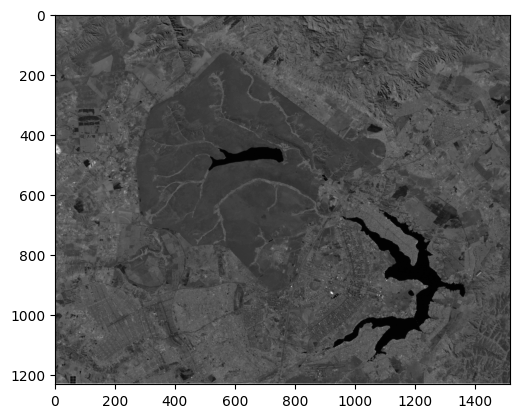

In [19]:
plt.imshow(img[:,:,3], cmap= 'Greys_r')

/usr/local/lib/python3.10/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  [0, 3.0, 5]
  Interpolation       :  <default>
  RGB data limits     :
    R: [40.0, 255.0]
    G: [12.0, 255.0]
    B: [1.0, 255.0]

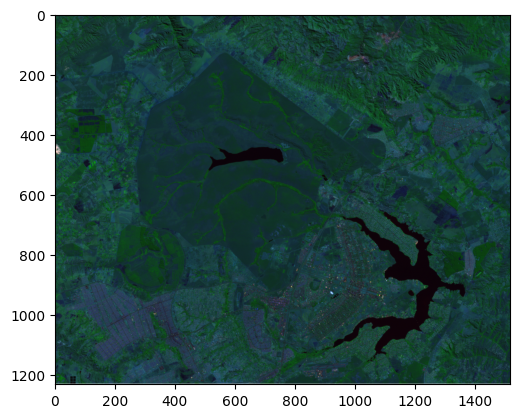

In [23]:
imshow(img)

ImageView object:
  Display bands       :  (2, 3, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

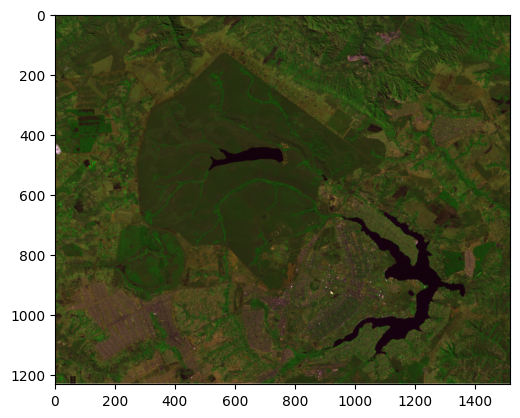

In [26]:
imshow(img, bands=(2,3,0))

In [45]:
#gdal

import numpy as np

from osgeo import gdal

In [28]:
img2 = gdal.Open('/content/drive/MyDrive/Notebooks_pdi_samara/L71221071_07120010720_DN.tif')

In [29]:
print(img2)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7900650e8f60> >


In [32]:
img3 = img2.ReadAsArray()

In [37]:
img3 = img3.swapaxes(0,1)

In [38]:
img3.shape

(1233, 1520, 6)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [12.0, 255.0]
    G: [12.0, 255.0]
    B: [12.0, 255.0]

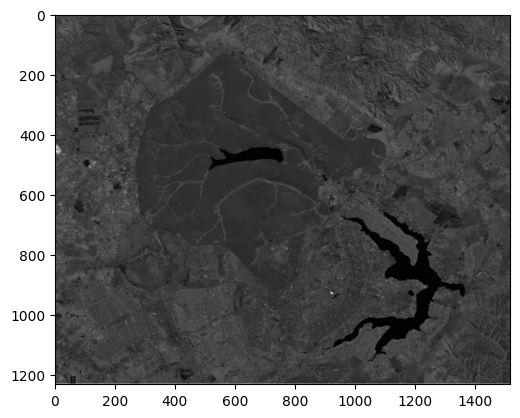

In [39]:
imshow(img3[:,:,3])

In [47]:
b1 = img2.GetRasterBand(1).ReadAsArray()
b2 = img2.GetRasterBand(2).ReadAsArray()
b4 = img2.GetRasterBand(4).ReadAsArray()

In [48]:
stack = np.dstack([b1,b2,b4])

In [49]:
stack.shape

(1233, 1520, 3)

/usr/local/lib/python3.10/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

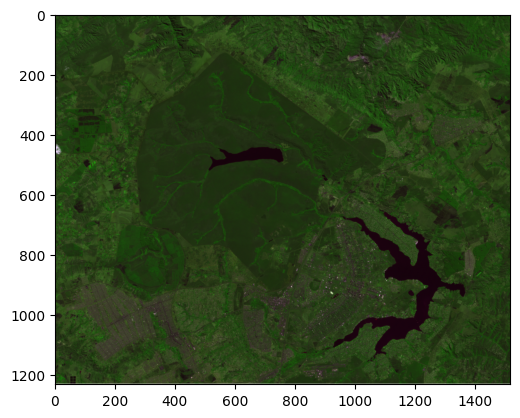

In [50]:
imshow(stack, (1,2,0))

In [55]:
#RASTERIO


import rasterio
from rasterio.plot import show

In [53]:
rst = rasterio.open ('/content/drive/MyDrive/Notebooks_pdi_samara/L71221071_07120010720_DN.tif')

In [54]:
print(rst)

<open DatasetReader name='/content/drive/MyDrive/Notebooks_pdi_samara/L71221071_07120010720_DN.tif' mode='r'>


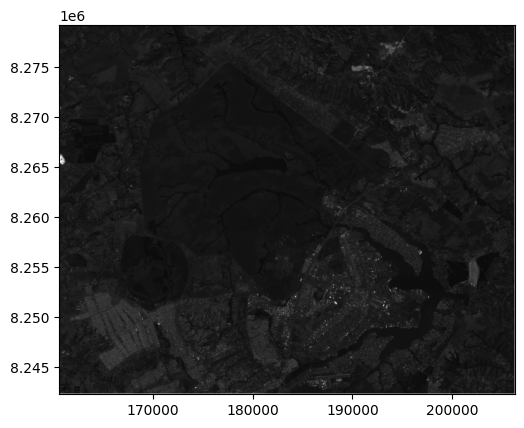

<Axes: >

In [57]:
show(rst, cmap= 'Greys_r')

In [65]:
with rasterio.open('/content/drive/MyDrive/Notebooks_pdi_samara/L71221071_07120010720_DN.tif') as rst:
  b1 = rst.read(1)
  b2 = rst.read(2)
  b4 = rst.read(4)

stack2 = np.dstack([b1,b2,b4])

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

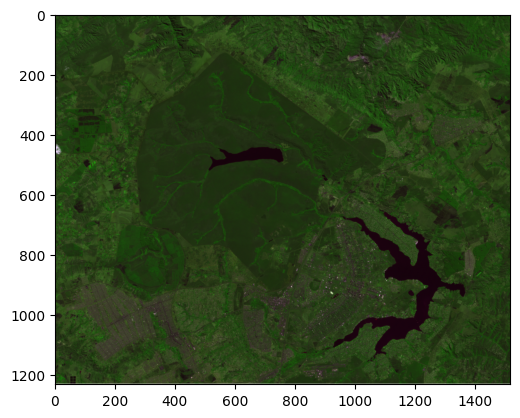

In [66]:
imshow(stack2, (1,2,0))